Importamos los módulos necesarios, así como configuramos la presentación de gráficos y cargamos el dataset `digits` de Scikit-Learn.

In [5]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
digits = load_digits()

In [4]:
print('Dimensiones de los datos de imagen', digits.data.shape)
print('Dimensiones de las etiquetas', digits.target.shape)

Dimensiones de los datos de imagen (1797, 64)
Dimensiones de las etiquetas (1797,)


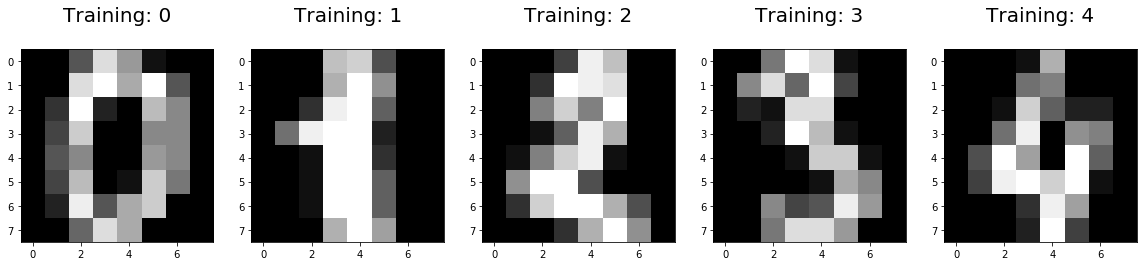

In [29]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1,5,index +1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

Ahora dividimos el dataset en Training y Test set:

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.23, random_state=2)

In [8]:
print(x_train.shape)

(1383, 64)


In [9]:
print(y_train.shape)

(1383,)


In [10]:
print(x_test.shape)

(414, 64)


In [11]:
print(y_test.shape)

(414,)


Importamos el modelo de regresión logística, lo instanciamos y lo entrenamos:

In [14]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

[4]


Hagamos una predicción sobre el primer elemento del test set, o sobre los diez primeros:

In [16]:
print(lr.predict(x_test[0].reshape(1,-1)))
lr.predict(x_test[0:10])

[4]


array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

Si hacemos la predicción para el dataset completo, obtenemos:

In [24]:
y_pred = lr.predict(x_test)

Vamos a determinar ahora la precisión del modelo:

In [20]:
score = lr.score(x_test, y_test)
print(score)

0.9420289855072463


Igualmente, vamos a representar la matriz de confusión en un mapa de calor:

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[38  0  0  0  0  0  0  0  0  0]
 [ 0 44  0  1  0  0  0  0  2  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  3  2  0]
 [ 0  2  0  0 34  0  0  0  1  1]
 [ 0  0  0  0  0 46  0  0  0  0]
 [ 0  0  0  0  0  0 40  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  2  0  0  0  0  0  0 35  1]
 [ 0  0  0  1  0  1  0  1  3 28]]


Text(0.5, 1, 'Accuracy Score: 0.9420289855072463')

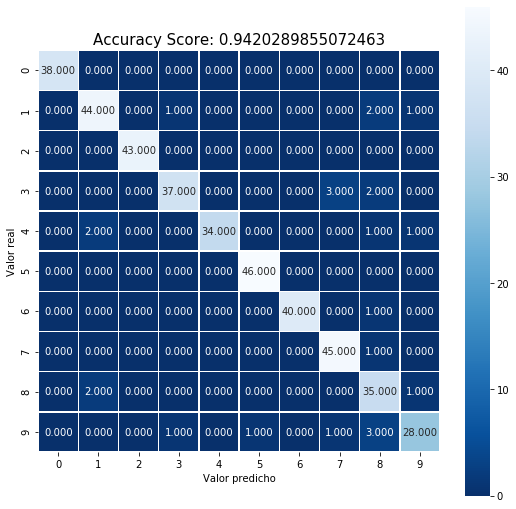

In [27]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Valor real')
plt.xlabel('Valor predicho')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)